In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu128
2.8.0+cu128


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
import IPython
import matplotlib.pyplot as plt

import torchaudio.functional as F

In [4]:
SPEECH_FILE = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
waveform, _ = torchaudio.load(SPEECH_FILE)
TRANSCRIPT = "i had that curiosity beside me at this moment".split()

/tmp/ipykernel_72949/1573443639.py:1: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  SPEECH_FILE = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
/home3/ebrahim2/brainaudio/.venv/lib/python3.12/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(

In [5]:
bundle = torchaudio.pipelines.MMS_FA

model = bundle.get_model(with_star=False).to(device)
with torch.inference_mode():
    emission, _ = model(waveform.to(device))

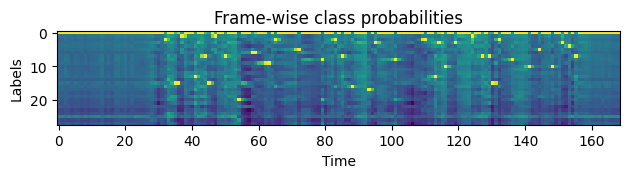

In [6]:
def plot_emission(emission):
    fig, ax = plt.subplots()
    ax.imshow(emission.cpu().T)
    ax.set_title("Frame-wise class probabilities")
    ax.set_xlabel("Time")
    ax.set_ylabel("Labels")
    fig.tight_layout()


plot_emission(emission[0])

In [7]:
LABELS = bundle.get_labels(star=None)
DICTIONARY = bundle.get_dict(star=None)
for k, v in DICTIONARY.items():
    print(f"{k}: {v}")

-: 0
a: 1
i: 2
e: 3
n: 4
o: 5
u: 6
t: 7
s: 8
r: 9
m: 10
k: 11
l: 12
d: 13
g: 14
h: 15
y: 16
b: 17
p: 18
w: 19
c: 20
v: 21
j: 22
z: 23
f: 24
': 25
q: 26
x: 27


In [10]:
tokenized_transcript = [DICTIONARY[c] for word in TRANSCRIPT for c in word]

for t in tokenized_transcript:
    print(t, end=" ")
print()

2 15 1 13 7 15 1 7 20 6 9 2 5 8 2 7 16 17 3 8 2 13 3 10 3 1 7 7 15 2 8 10 5 10 3 4 7 


In [11]:
def align(emission, tokens):
    targets = torch.tensor([tokens], dtype=torch.int32, device=device)
    alignments, scores = F.forced_align(emission, targets, blank=0)

    alignments, scores = alignments[0], scores[0]  # remove batch dimension for simplicity
    scores = scores.exp()  # convert back to probability
    return alignments, scores


aligned_tokens, alignment_scores = align(emission, tokenized_transcript)

/tmp/ipykernel_72949/192955208.py:3: UserWarning: torchaudio.functional._alignment.forced_align has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  alignments, scores = F.forced_align(emission, targets, blank=0)


In [13]:
for i, (ali, score) in enumerate(zip(aligned_tokens, alignment_scores)):
    print(f"{i:3d}:\t{ali:2d} [{LABELS[ali]}], {score:.2f}")

  0:	 0 [-], 1.00
  1:	 0 [-], 1.00
  2:	 0 [-], 1.00
  3:	 0 [-], 1.00
  4:	 0 [-], 1.00
  5:	 0 [-], 1.00
  6:	 0 [-], 1.00
  7:	 0 [-], 1.00
  8:	 0 [-], 1.00
  9:	 0 [-], 1.00
 10:	 0 [-], 1.00
 11:	 0 [-], 1.00
 12:	 0 [-], 1.00
 13:	 0 [-], 1.00
 14:	 0 [-], 1.00
 15:	 0 [-], 1.00
 16:	 0 [-], 1.00
 17:	 0 [-], 1.00
 18:	 0 [-], 1.00
 19:	 0 [-], 1.00
 20:	 0 [-], 1.00
 21:	 0 [-], 1.00
 22:	 0 [-], 1.00
 23:	 0 [-], 1.00
 24:	 0 [-], 1.00
 25:	 0 [-], 1.00
 26:	 0 [-], 1.00
 27:	 0 [-], 1.00
 28:	 0 [-], 1.00
 29:	 0 [-], 1.00
 30:	 0 [-], 1.00
 31:	 0 [-], 1.00
 32:	 2 [i], 1.00
 33:	 0 [-], 1.00
 34:	 0 [-], 1.00
 35:	15 [h], 1.00
 36:	15 [h], 0.93
 37:	 1 [a], 1.00
 38:	 0 [-], 0.96
 39:	 0 [-], 1.00
 40:	 0 [-], 1.00
 41:	13 [d], 1.00
 42:	 0 [-], 1.00
 43:	 0 [-], 0.97
 44:	 7 [t], 1.00
 45:	15 [h], 1.00
 46:	 0 [-], 0.98
 47:	 1 [a], 1.00
 48:	 0 [-], 1.00
 49:	 0 [-], 1.00
 50:	 7 [t], 1.00
 51:	 0 [-], 1.00
 52:	 0 [-], 1.00
 53:	 0 [-], 1.00
 54:	20 [c], 1.00
 55:	 0 [-

In [14]:
token_spans = F.merge_tokens(aligned_tokens, alignment_scores)

print("Token\tTime\tScore")
for s in token_spans:
    print(f"{LABELS[s.token]}\t[{s.start:3d}, {s.end:3d})\t{s.score:.2f}")

Token	Time	Score
i	[ 32,  33)	1.00
h	[ 35,  37)	0.96
a	[ 37,  38)	1.00
d	[ 41,  42)	1.00
t	[ 44,  45)	1.00
h	[ 45,  46)	1.00
a	[ 47,  48)	1.00
t	[ 50,  51)	1.00
c	[ 54,  55)	1.00
u	[ 58,  60)	0.98
r	[ 63,  64)	1.00
i	[ 65,  66)	1.00
o	[ 72,  73)	1.00
s	[ 79,  80)	1.00
i	[ 83,  84)	1.00
t	[ 85,  86)	1.00
y	[ 88,  89)	1.00
b	[ 93,  94)	1.00
e	[ 95,  96)	1.00
s	[101, 102)	1.00
i	[110, 111)	1.00
d	[113, 114)	1.00
e	[114, 115)	0.85
m	[116, 117)	1.00
e	[119, 120)	1.00
a	[124, 125)	1.00
t	[127, 128)	1.00
t	[129, 130)	1.00
h	[130, 131)	1.00
i	[132, 133)	1.00
s	[136, 137)	1.00
m	[141, 142)	1.00
o	[144, 145)	1.00
m	[148, 149)	1.00
e	[151, 152)	1.00
n	[153, 154)	1.00
t	[155, 156)	1.00


In [27]:
len(token_spans)

37

In [15]:
def unflatten(list_, lengths):
    assert len(list_) == sum(lengths)
    i = 0
    ret = []
    for l in lengths:
        ret.append(list_[i : i + l])
        i += l
    return ret


word_spans = unflatten(token_spans, [len(word) for word in TRANSCRIPT])

In [33]:
for word_span, word in zip(word_spans, TRANSCRIPT):
    
    print(word_span[0].start, word_span[-1].end, word)

32 33 i
35 42 had
44 51 that
54 89 curiosity
93 115 beside
116 120 me
124 128 at
129 137 this
141 156 moment


In [17]:
def _score(spans):
    return sum(s.score * len(s) for s in spans) / sum(len(s) for s in spans)


def preview_word(waveform, spans, num_frames, transcript, sample_rate=bundle.sample_rate):
    ratio = waveform.size(1) / num_frames
    x0 = int(ratio * spans[0].start)
    x1 = int(ratio * spans[-1].end)
    print(f"{transcript} ({_score(spans):.2f}): {x0 / sample_rate:.3f} - {x1 / sample_rate:.3f} sec")
    segment = waveform[:, x0:x1]
    return IPython.display.Audio(segment.numpy(), rate=sample_rate)

num_frames = emission.size(1)

In [18]:
# Generate the audio for each segment
print(TRANSCRIPT)
IPython.display.Audio(SPEECH_FILE)

['i', 'had', 'that', 'curiosity', 'beside', 'me', 'at', 'this', 'moment']


In [19]:
preview_word(waveform, word_spans[0], num_frames, TRANSCRIPT[0])

i (1.00): 0.644 - 0.664 sec


In [20]:
preview_word(waveform, word_spans[1], num_frames, TRANSCRIPT[1])

had (0.98): 0.704 - 0.845 sec


In [21]:
preview_word(waveform, word_spans[2], num_frames, TRANSCRIPT[2])

that (1.00): 0.885 - 1.026 sec


In [22]:
def plot_alignments(waveform, token_spans, emission, transcript, sample_rate=bundle.sample_rate):
    ratio = waveform.size(1) / emission.size(1) / sample_rate
        
    fig, axes = plt.subplots(2, 1)
    axes[0].imshow(emission[0].detach().cpu().T, aspect="auto")
    axes[0].set_title("Emission")
    axes[0].set_xticks([])

    axes[1].specgram(waveform[0], Fs=sample_rate)
    for t_spans, chars in zip(token_spans, transcript):
        t0, t1 = t_spans[0].start + 0.1, t_spans[-1].end - 0.1
        axes[0].axvspan(t0 - 0.5, t1 - 0.5, facecolor="None", hatch="/", edgecolor="white")
        axes[1].axvspan(ratio * t0, ratio * t1, facecolor="None", hatch="/", edgecolor="white")
        axes[1].annotate(f"{_score(t_spans):.2f}", (ratio * t0, sample_rate * 0.51), annotation_clip=False)

        for span, char in zip(t_spans, chars):
            t0 = span.start * ratio
            axes[1].annotate(char, (t0, sample_rate * 0.55), annotation_clip=False)

    axes[1].set_xlabel("time [second]")
    axes[1].set_xlim([0, None])
    fig.tight_layout()

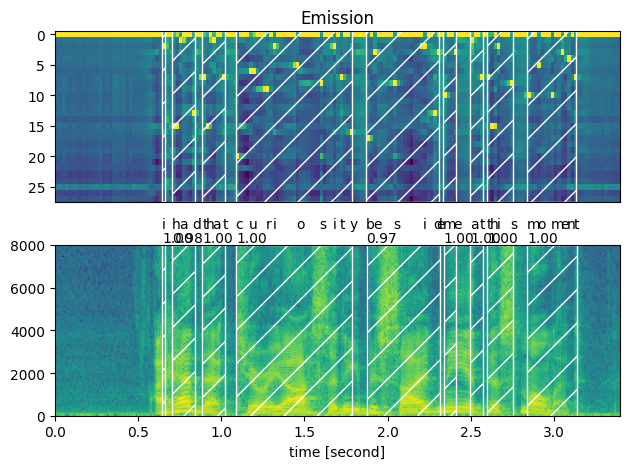

In [23]:
plot_alignments(waveform, word_spans, emission, TRANSCRIPT)